# Calculating Theoretical Yields

This notebook will demonstrate the calculation of 
- molar yield, 
- mass yield, 
- carbon yield, 
- biomass yield.

Loading the needed python packages

In [1]:
import cobra.test
from cobrapy_bigg_client import client
from cobra.flux_analysis import production_envelope

Loading the model and creating a clean copy

In [2]:
model_original = client.download_model('e_coli_core', save=False) # Download model from the BIGG database
model_original.solver = 'glpk'
model = model_original.copy()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


## Molar Yield

**Dividing the production flux by the uptake flux of the carbon source** (in this case glucose) yields the theoretical maximum molar yield (mol product / mol carbon source).

Calculating the maximum yield of a model designed to produce acetate. First, set the exchange reaction associated with the desired bioproduct ('EX_ac_e') as the new objective function of the model. By making acetate the objective function will force the cell to produce the maximum amount of acetate.

In [3]:
model.objective = model.reactions.EX_ac_e

The maximum production of acetate flux (mmol/gDW-hr) is found by.

In [4]:
solution = model.optimize()
solution.fluxes['EX_ac_e']

20.000000000000004

The **molar yield** calculation 

    (mol product / mol carbon source) = (product flux / carbon source flux)

In [5]:
myield = solution.fluxes['EX_ac_e'] / (-1. * solution.fluxes['EX_glc__D_e'])
print('Theoretical maximum molar yield = ',myield.round(4))

Theoretical maximum molar yield =  2.0


## Mass Yield

**Dividing the production flux times it's molecular weight by the uptake flux of the carbon source times it's molecular weight** yields the theoretical maximum mass yield 

    (mol product * MW / mol glucose * MW) = (product flux * MW / (-1) * carbon source flux * MW).

In [6]:
MW_ac = model.metabolites.ac_e.formula_weight # Molecular weight of acetate
MW_glc = model.metabolites.glc__D_e.formula_weight # Molecular weight of glucose
gyield = MW_ac*solution.fluxes['EX_ac_e'] / (-1. * solution.fluxes['EX_glc__D_e']*MW_glc)
print('Mass yield = ',gyield)

Mass yield =  0.6554770235642602


## Carbon Yield

The carbon yield is found by the product of the number of carbon atoms in the product times the product flux divided by the product of the number of carbon atoms in the carbon source times the carbon source flux. 

    (Np * mol product / (-1) * Nc * mol carbon source) = (Np * product flux / (-1) * Nc * carbon source flux)

In [7]:
Nc = model.metabolites.glc__D_e.elements['C'] # Number of carbon atoms in glucose
Np = model.metabolites.ac_e.elements['C'] # Number of carbon atoms in acetate
cyield = Np*solution.fluxes['EX_ac_e'] / (-1. * Nc*solution.fluxes['EX_glc__D_e'])
print('Theoretical maximum carbon yield = ',cyield.round(4))

Theoretical maximum carbon yield =  0.6667


## Biomass Yield

Dividing the biomass flux by the uptake flux of the carbon source yields the theoretical maximum biomass yield 

    (mol biomass / mol carbon source) = (biomass flux / carbon source flux)


In [8]:
model2 = model_original.copy()
model2.objective = model2.reactions.BIOMASS_Ecoli_core_w_GAM
solution2 = model2.optimize()
byield = solution2.objective_value / (-1. * solution2.fluxes['EX_glc__D_e'])
print('Maximum biomass yield = ',byield)

Maximum biomass yield =  0.08739215069684295


## Molar and Carbon Yield Examples

Let's look at an example where we have a single glucose carbon source with secretions of acetate, formate and carbon dioxide.

In [9]:
model3 = model_original.copy()
model3.reactions.EX_o2_e.lower_bound = -10
solution3 = model3.optimize()
model3.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,3.048,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,2.057,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-9.906,2,54.71%
co2_e,EX_co2_e,-4.895,1,13.52%
for_e,EX_for_e,-11.5,1,31.77%
h2o_e,EX_h2o_e,-8.967,0,0.00%
h_e,EX_h_e,-32.62,0,0.00%


Notice we have the simulated conditions of a single glucose carbon source with secretions of acetate, formate and carbon dioxide. The carbon flux percentage is found by creating a demoninator of the sum of the carbon fluxes fluxes with a C-number) times the carbon number associated with that flux. The numerator for each flux is the flux times the C-Number.

    flux_i_percent = 100 * (flux_i * flux_i_C_num)/(flux_i * flux_i_C_num + ... + flux_n * flux_n_C_num)

Now let's look at the data produced by a production envelope

In [10]:
prod_env = production_envelope(
    model3, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")
prod_env

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,20.000000,0.666667,0.655477,-10.000000
1,EX_glc__D_e,0.0,0.0,0.0,19.473684,0.649123,0.638228,-9.473684
2,EX_glc__D_e,0.0,0.0,0.0,18.947368,0.631579,0.620978,-8.947368
3,EX_glc__D_e,0.0,0.0,0.0,18.421053,0.614035,0.603729,-8.421053
4,EX_glc__D_e,0.0,0.0,0.0,17.894737,0.596491,0.586479,-7.894737
5,EX_glc__D_e,0.0,0.0,0.0,17.368421,0.578947,0.569230,-7.368421
6,EX_glc__D_e,0.0,0.0,0.0,16.842105,0.561404,0.551981,-6.842105
7,EX_glc__D_e,0.0,0.0,0.0,16.315789,0.543860,0.534731,-6.315789
8,EX_glc__D_e,0.0,0.0,0.0,15.789474,0.526316,0.517482,-5.789474
9,EX_glc__D_e,0.0,0.0,0.0,15.263158,0.508772,0.500232,-5.263158


The carbon yield is calculated by

    cyield = solution.fluxes['Product'] / (-1. * solution.fluxes['Carbon Source'])
    
For each row the carbon yield is found by

        cyield = flux_maximum / (-1. * Carbon Source Flux)

In [11]:
# Top row
cyield = 20*2 / (-1. * 10*6)
print('Top row carbon_yield_maximum = ',cyield)

# Middle row
cyield1 = 15.263158*2 / (-1. * 10*6)
print('Middle row carbon_yield_maximum = ',cyield1)

Top row carbon_yield_maximum =  -0.6666666666666666
Middle row carbon_yield_maximum =  -0.5087719333333334


The mass yield is calculated by

    myield = MW_prod * solution.fluxes['Product'] / (-1. * MW_cs * solution.fluxes['Carbon Source'])
    
For each row the carbon yield is found by

        myield = MW_prod * flux_maximum / (-1. * MW_cs * Carbon Source Flux)

In [12]:
# Top row
gyield = MW_ac * 20 / (-1. * 10 * MW_glc)
print('Top row mass_yield_maximum = ',gyield)

# Middle row
gyield1 = MW_ac*15.263158 / (-1. * 10 * MW_glc)
print('Top row mass_yield_maximum = ',gyield1)

Top row mass_yield_maximum =  -0.65547702356426
Top row mass_yield_maximum =  -0.5002324688015513


## Growth vs. Product Yields Example

Determina molar, mass, and c-mol yields of acetate for the following growth rates.

In [13]:
growth_rates = [0.0, 0.10915242, 0.21830485, 0.32745727, 0.43660969, 0.54576212, 
                0.65491454, 0.76406697, 0.87321939]

In [14]:
model4 = model_original.copy()
model4.objective = model4.reactions.EX_ac_e # Setting the objective to acetate

product_fluxes = []
myield_fluxes = []
gyield_fluxes = []
cyield_fluxes = []
byield_fluxes = []
for x in growth_rates:
    model4.reactions.BIOMASS_Ecoli_core_w_GAM.bounds = [x,x]
    solution4 = model4.optimize()
    product_fluxes.append(solution4.fluxes.EX_ac_e)
    myield_fluxes.append(solution4.fluxes['EX_ac_e'] / (-1. * solution4.fluxes['EX_glc__D_e']))
    gyield_fluxes.append(MW_ac*solution4.fluxes['EX_ac_e'] / (-1. * solution4.fluxes['EX_glc__D_e']*MW_glc))
    cyield_fluxes.append(Np*solution4.fluxes['EX_ac_e'] / (-1. * Nc*solution4.fluxes['EX_glc__D_e']))
    byield_fluxes.append(solution4.fluxes['BIOMASS_Ecoli_core_w_GAM'] / (-1. * solution4.fluxes['EX_glc__D_e']))

### Plotting the maximum acetate fluxes.

Plotting acetate when it is used as the objective value

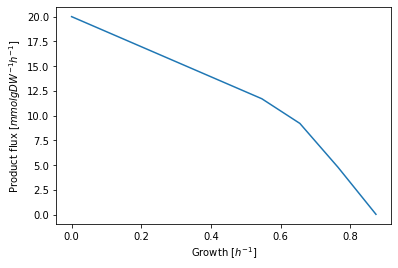

In [15]:
import matplotlib.pyplot as plt
plt.plot(growth_rates, product_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Product flux [$mmol gDW^{-1} h^{-1}$]')
plt.show()

In [16]:
num = 0
model5 = model_original.copy()
model5.objective = model5.reactions.EX_ac_e
model5.reactions.BIOMASS_Ecoli_core_w_GAM.bounds = [growth_rates[num],growth_rates[num]]
solution5 = model5.optimize()
solution5.fluxes.EX_ac_e
print('Acetate flux =',solution5.fluxes.EX_ac_e,';  growth rate =',growth_rates[num] )
solution5.objective_value

Acetate flux = 20.000000000000004 ;  growth rate = 0.0


20.000000000000004

### Plotting the maximum molar yield fluxes.

    (mol product / mol carbon source) = (product flux / carbon source flux)

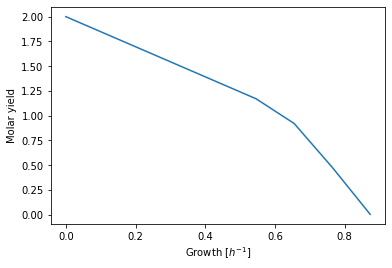

In [17]:
plt.plot(growth_rates,  myield_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Molar yield')
plt.show()

### Plotting the maximum mass yield fluxes.

    (mol product * MW / mol glucose * MW) = (product flux * MW / (-1) * carbon source flux * MW)

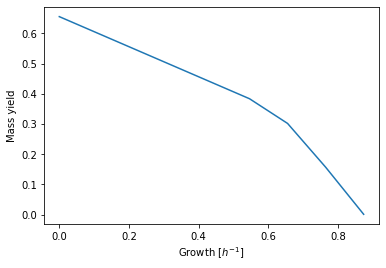

In [18]:
plt.plot(growth_rates,  gyield_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Mass yield')
plt.show()

### Plotting the maximum carbon yield fluxes.

    (Np * mol product / (-1) * Nc * mol carbon source) = (Np * product flux / (-1) * Nc * carbon source flux)

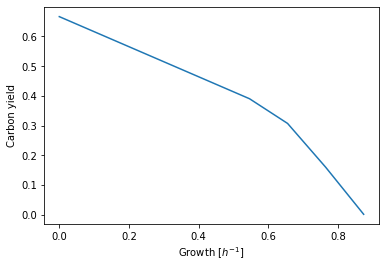

In [19]:
plt.plot(growth_rates,  cyield_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Carbon yield')
plt.show()

### Plotting the maximum biomass yield fluxes.

    (mol biomass / mol carbon source) = (biomass flux / carbon source flux)

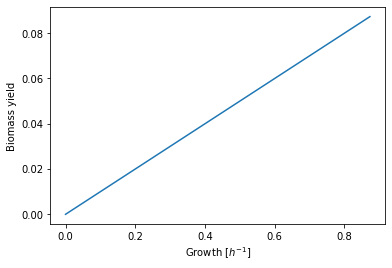

In [20]:
plt.plot(growth_rates,  byield_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Biomass yield')
plt.show()